In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
datapath = "dataset/opsd_germany_daily.csv"

## 1. Import and indexing dataframe with col's value look like datetime type

In [4]:
df = pd.read_csv(datapath,index_col =0, parse_dates =True)
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Weekday Name"] = df.index.weekday
df.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,5
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,3
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,3
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,4
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,1


## 2. Time-based indexing

In [5]:
df.loc["2008-09" : "2009-09"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-09-01,1386.419,NaN,NaN,NaN,2008,9,0
2008-09-02,1399.869,NaN,NaN,NaN,2008,9,1
2008-09-03,1409.421,NaN,NaN,NaN,2008,9,2
2008-09-04,1405.844,NaN,NaN,NaN,2008,9,3
2008-09-05,1369.440,NaN,NaN,NaN,2008,9,4
...,...,...,...,...,...,...,...
2009-09-26,1080.103,NaN,NaN,NaN,2009,9,5
2009-09-27,986.645,NaN,NaN,NaN,2009,9,6
2009-09-28,1325.561,NaN,NaN,NaN,2009,9,0


## 3. Visualizing time series data:

<Axes: xlabel='Date'>

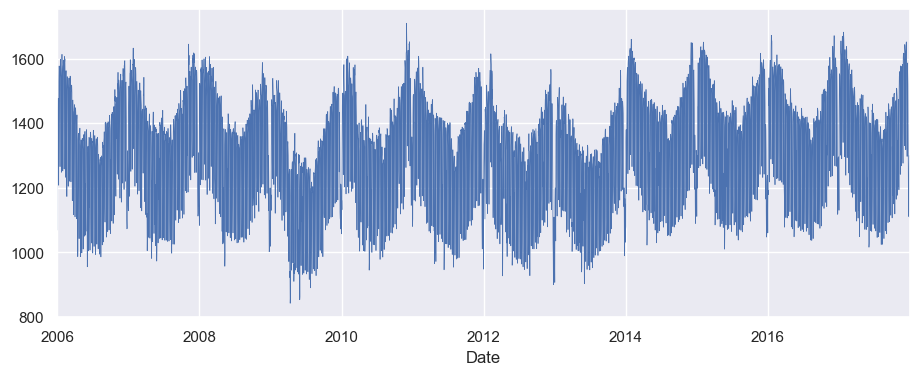

In [6]:
# seaborn plot
sns.set(rc={"figure.figsize":(11,4)})
df["Consumption"].plot(linewidth = 0.5)

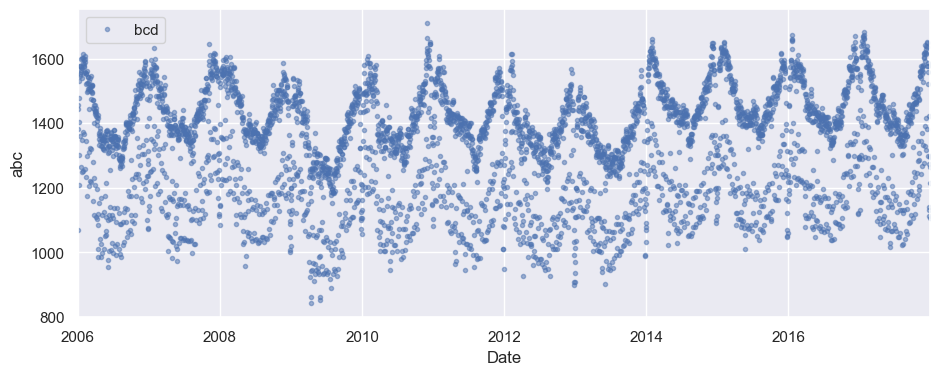

In [7]:
# Pandas plot
ax = df["Consumption"].plot( marker =".", alpha =0.5 , linestyle ="None", figsize =(11 , 4), label = "bcd")
ax.set_ylabel("abc")
ax.legend()
plt.show()

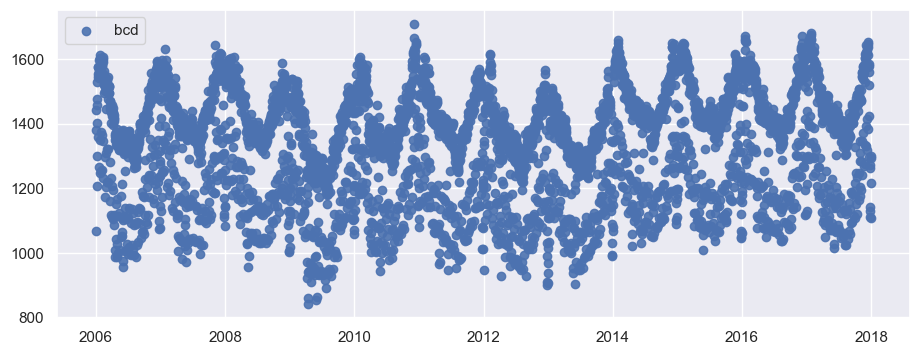

In [8]:
# matplotlib plot
fig, ax = plt.subplots(figsize =(11,4))
ax.scatter(df.index, df["Consumption"], alpha = 0.9, label = "bcd")
ax.legend()
plt.show()

## 4. Seasonality

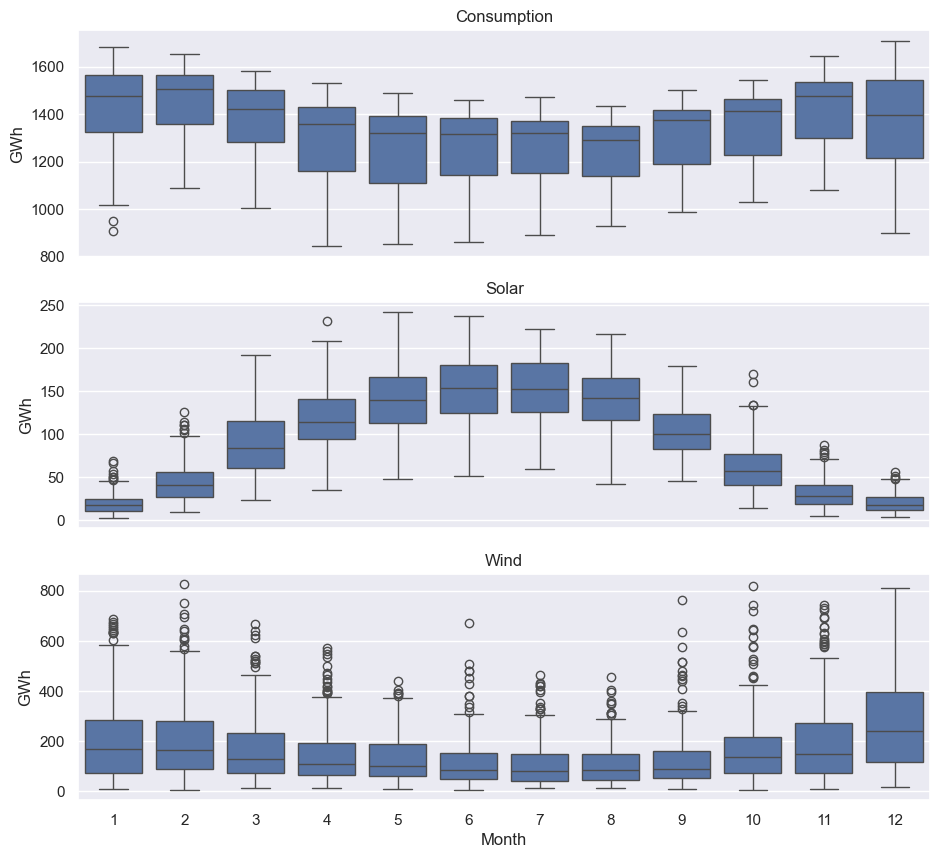

In [9]:
fig, axes = plt.subplots(3,1, figsize = (11,10), sharex= True)
for name , ax in zip(["Consumption", "Solar", "Wind"], axes):
    sns.boxplot(data = df, x = "Month", y = name, ax = ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel("")
plt.show()

## 5. Frequencies:

In [10]:
pd.date_range("1998-03-10","1998-03-15", freq = "D")

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.date_range("1998-03-10",periods = 9, freq = "B")

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-16', '1998-03-17', '1998-03-18', '1998-03-19',
               '1998-03-20'],
              dtype='datetime64[ns]', freq='B')

In [12]:
# Forwad fill:

#Create a sample of datetimes
time_sample = pd.to_datetime(["2013-02-03", "2013-02-06", "2013-02-08"])

# find its corresponding consumption
consumption_data = df.loc[time_sample, ["Consumption"]].copy()
consumption_data

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [13]:
# Convert the data to daily frequency (add a sequence of time along the column)
consumption_freq = consumption_data.asfreq("D")
consumption_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [14]:
# Filling the missing data
consumption_freq["Forwardfilled_Consumption"] = consumption_data.asfreq("D", method = "ffill")
consumption_freq

,Consumption,Forwardfilled_Consumption
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


## 6. Resampling

In [36]:
data_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]
df_mean = df[data_columns].resample("W").mean()
df_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Year,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


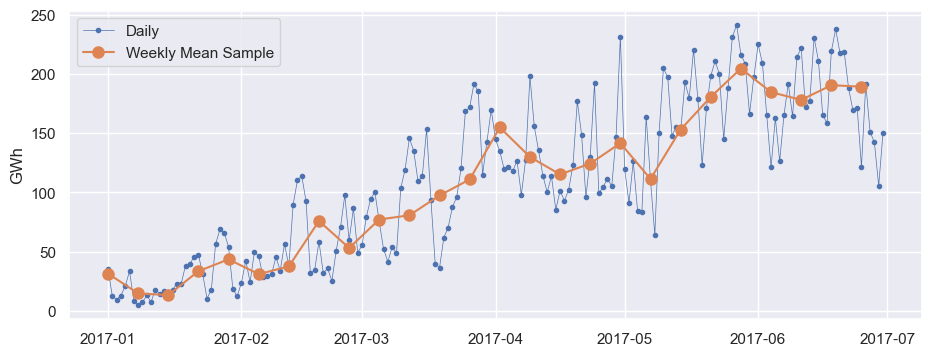

In [37]:
start , end = "2017-01" , "2017-06"
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(df.loc[start:end, "Solar"], marker = ".", linestyle = "-", linewidth = 0.5, label = "Daily")
ax.plot(df_mean.loc[start:end, "Solar"], marker = "o", markersize = 8, linestyle = "-", label = "Weekly Mean Sample")
ax.set_ylabel("GWh")
ax.legend()
plt.show()

In [39]:
df_annual = df[data_columns].resample("YE").sum(min_count = 360)
df_annual = df_annual.set_index(df_annual.index.year)
df.index.name = "Year"
df_annual["Wind+Solar/Consumption"] = df_annual["Wind+Solar"] / df_annual["Consumption"]
df_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


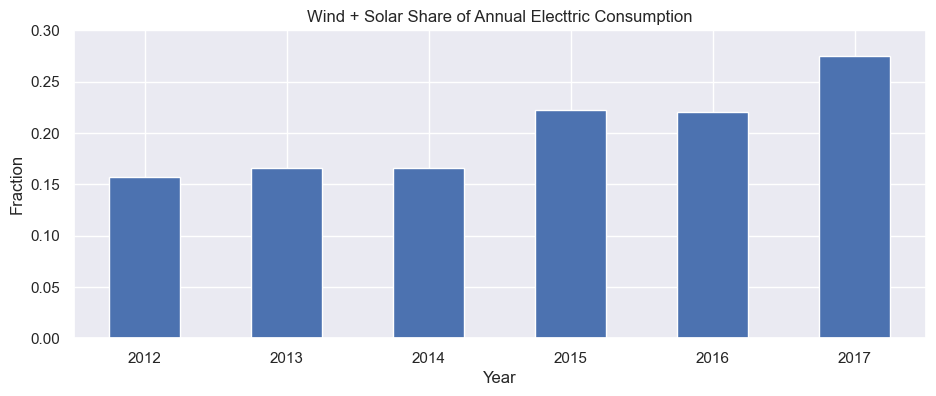

In [46]:
ax = df_annual.loc[2012:, "Wind+Solar/Consumption"].plot.bar(color = "C0")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 0.3)
ax.set_title("Wind + Solar Share of Annual Electtric Consumption")
plt.xticks(rotation = 0)
plt.show()

## 7. Rolling windows

In [47]:
df_7d = df[data_columns].rolling(7, center= True).mean()
df_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Year,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


## 8. Trends

In [49]:
df_365d = df[data_columns].rolling(window = 365, center = True, min_periods = 360).mean()

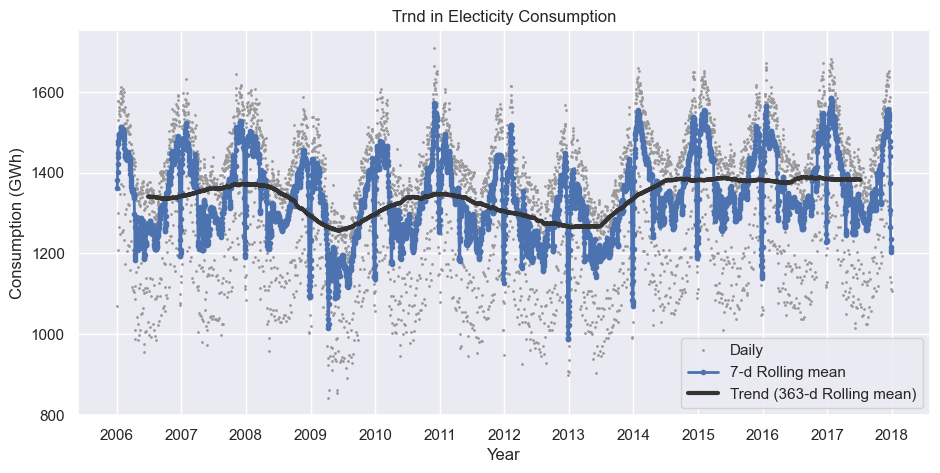

In [61]:
fig, ax = plt.subplots(figsize = (11,5))
ax.plot(df["Consumption"], marker = ".", markersize = 2, color = "0.6", linestyle = "None", label = "Daily")
ax.plot(df_7d["Consumption"], marker = ".", linewidth = 2, label = "7-d Rolling mean")
ax.plot(df_365d["Consumption"], color = "0.2", linewidth = 3, label = "Trend (363-d Rolling mean)")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Trnd in Electicity Consumption")
plt.show()

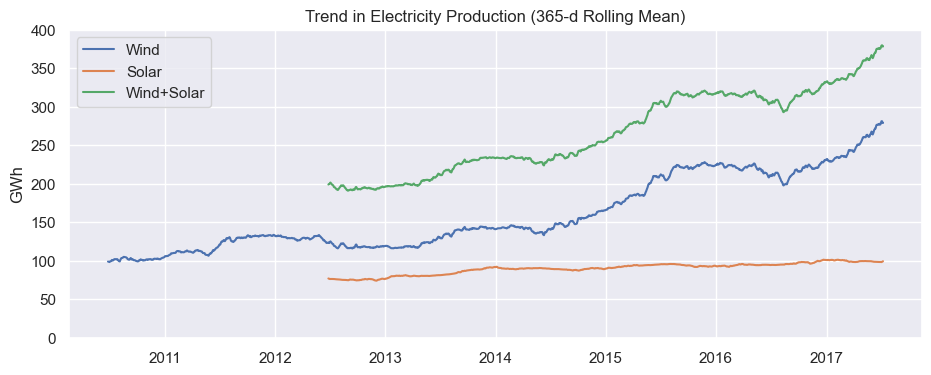

In [63]:
fig, ax = plt.subplots()
for nm in ["Wind", "Solar", "Wind+Solar"]:
    ax.plot(df_365d[nm], label = nm)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel("GWh")
    ax.set_title("Trend in Electricity Production (365-d Rolling Mean)")
plt.show()